In [6]:
from huggingface_hub import hf_hub_download

import torch

from transformers import TimeSeriesTransformerForPrediction

file = hf_hub_download(

    repo_id="hf-internal-testing/tourism-monthly-batch", filename="train-batch.pt", repo_type="dataset"

)

batch = torch.load(file)

model = TimeSeriesTransformerForPrediction.from_pretrained(

    "huggingface/time-series-transformer-tourism-monthly"

)

# during training, one provides both past and future values

# as well as possible additional features

outputs = model(

    past_values=batch["past_values"],

    past_time_features=batch["past_time_features"],

    past_observed_mask=batch["past_observed_mask"],

    static_categorical_features=batch["static_categorical_features"],

    static_real_features=batch["static_real_features"],

    future_values=batch["future_values"],

    future_time_features=batch["future_time_features"],

)

loss = outputs.loss

loss.backward()

# during inference, one only provides past values

# as well as possible additional features

# the model autoregressively generates future values

outputs = model.generate(

    past_values=batch["past_values"],

    past_time_features=batch["past_time_features"],

    past_observed_mask=batch["past_observed_mask"],

    static_categorical_features=batch["static_categorical_features"],

    static_real_features=batch["static_real_features"],

    future_time_features=batch["future_time_features"],

)

mean_prediction = outputs.sequences.mean(dim=1)

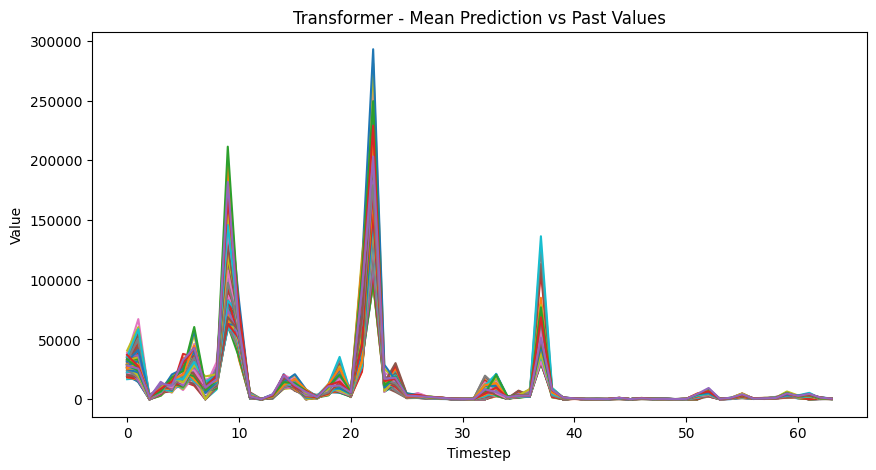

In [8]:
import matplotlib.pyplot as plt

# Extract past_values from the batch
past_values = batch['past_values']

# Calculate mean prediction
mean_prediction = outputs.sequences.mean(dim=1)

# Plot mean prediction and past_values
plt.figure(figsize=(10, 5))
plt.plot(past_values, label='Past Values')
plt.plot(mean_prediction, label='Mean Prediction')
plt.title('Transformer - Mean Prediction vs Past Values')
plt.xlabel('Timestep')
plt.ylabel('Value')
#plt.legend()
plt.show()